<a href="https://colab.research.google.com/github/devxkrxshna/Denoising-Autoencoder/blob/main/23_11_22_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import random as rd
import os
from PIL import Image
import cv2


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [6]:
#setting seed for reproducability
from numpy.random import seed
seed(25)
np.random.seed(50)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
source="https://www.kaggle.com/code/krinapanchal/vgg16-implementation" #code source for reference
Drivelink="https://drive.google.com/drive/folders/119twOXj4rydtZDwPOwLq3UVZ6D5u-8Nf?usp=sharing" #drive link to mri barin dataset 

In [9]:
data= [] #creating a list for images
paths = [] #creating list for paths
for r, d, f in os.walk(r'/content/drive/MyDrive/Colab Notebooks/brain_images_2000'): #OS.walk() generate the file names in a directory tree by walking the tree, tuple (dirpath, dirnames, filenames). update the path of your respective folder in drive
    for file in f:
        if '.jpg' or '.jpeg' or '.JPG' or '.png' in file:
            paths.append(os.path.join(r, file))


In [10]:
for path in paths:
    img = Image.open(path)  
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))

In [11]:
#test data
data_test = [] #creating a list for images
paths_test = [] #creating list for paths
for r, d, f in os.walk(r'/content/drive/MyDrive/Colab Notebooks/brain_mri_400'): #OS.walk() generate the file names in a directory tree by walking the tree, tuple (dirpath, dirnames, filenames). update the path of your respective folder in drive
    for file in f:
        if '.jpg' or '.jpeg' or '.JPG' or '.png' in file:
            paths_test.append(os.path.join(r, file))

In [12]:
#test data
for path in paths_test:
    img = Image.open(path)  
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))

In [13]:
data = np.array(data)
print('data shape is:', data.shape) ##we have 1837 images with 128 height, 128 width, RGB color channel



data shape is: (1837, 128, 128, 3)


In [14]:
data_test = np.array(data_test)
print('data shape is:', data_test.shape)

data shape is: (483, 128, 128, 3)


In [15]:
#Each pixel has a value between 255 and 0. We will reduce this down to 1 and 0 in order to help the neural network converge quicker.
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))


#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))

#print(data)

255
0
1.0
0.0


In [16]:
#test data normalization

print(np.max(data_test))
#getting the min of the array
print(np.min(data_test))


#reducing the data to between 1 and 0
data_test = data_test / 255.00
#getting the max of the array
print(np.max(data_test))
#getting the min of the array
print(np.min(data_test))

#print(data)

255
0
1.0
0.0


In [17]:
data=tf.convert_to_tensor(data)
data.shape

TensorShape([1837, 128, 128, 3])

In [18]:
data_test=tf.convert_to_tensor(data_test)
data_test.shape

TensorShape([483, 128, 128, 3])

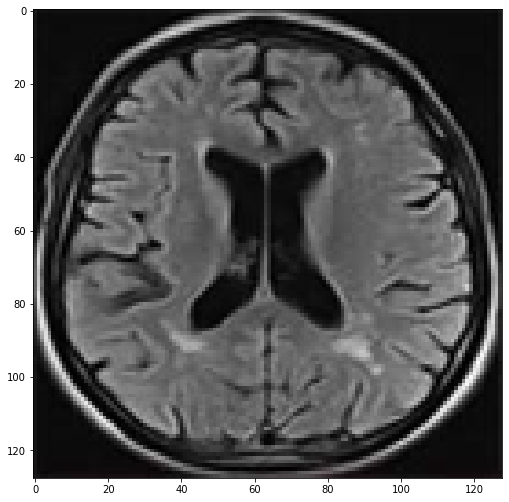

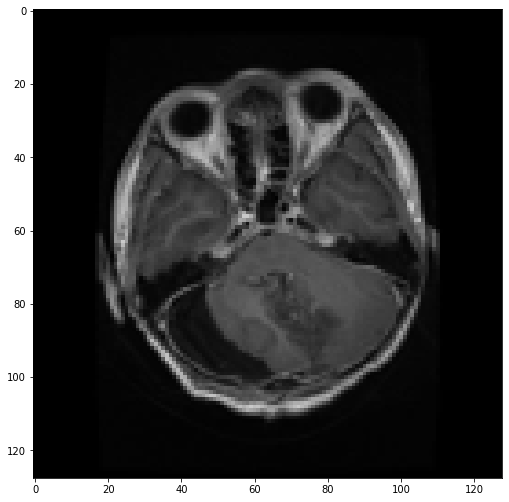

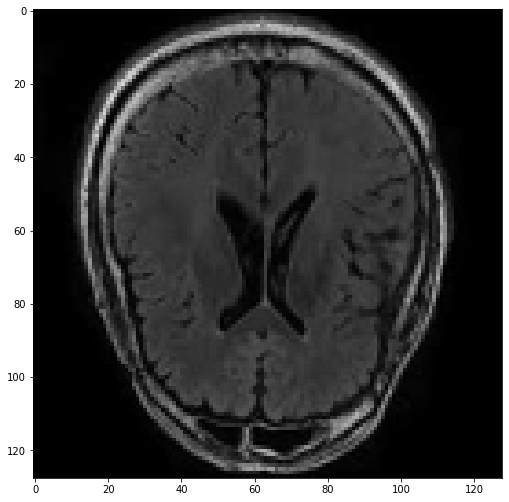

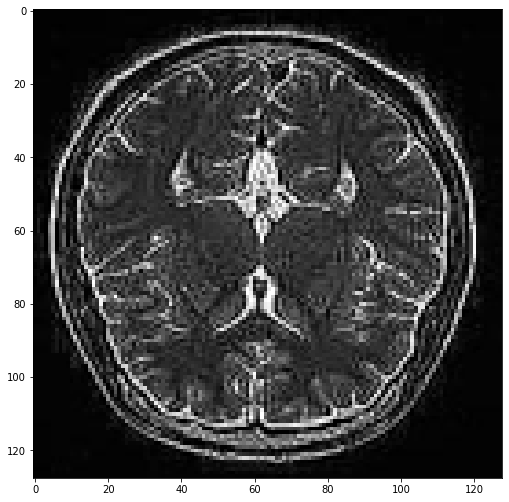

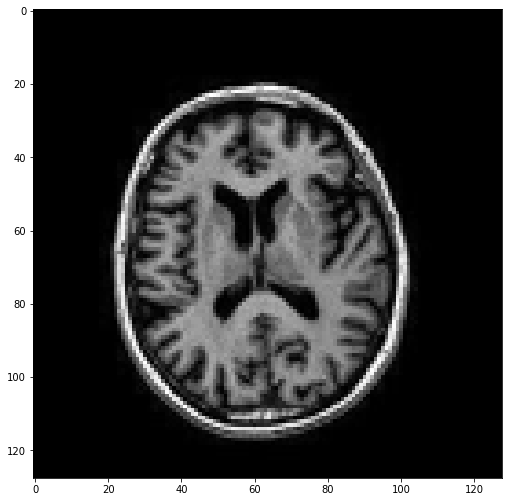

In [19]:
for i in range(5):
    fig = plt.figure(figsize=(50,50))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

In [20]:
new_dataset="https://www.kaggle.com/datasets/darren2020/ct-to-mri-cgan"

**Average method**: The Average method takes the average value of R, G, and B as the grayscale value. 
Grayscale = (R + G + B ) / 3

In [21]:
noise_factor =0.08
data_noisy = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
data_noisy = np.clip(data_noisy, 0., 1.)

In [22]:
#addimg noise to test data
noise_factor =0.08
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

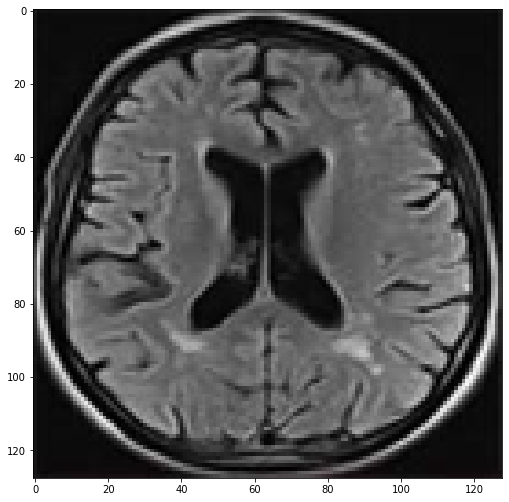

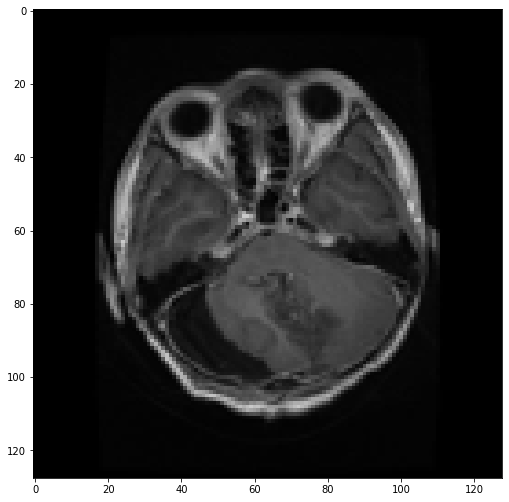

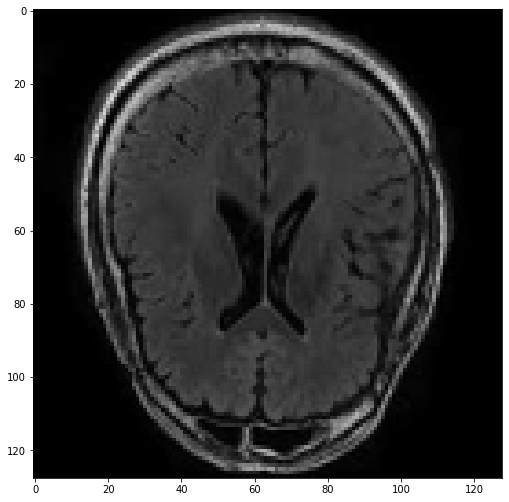

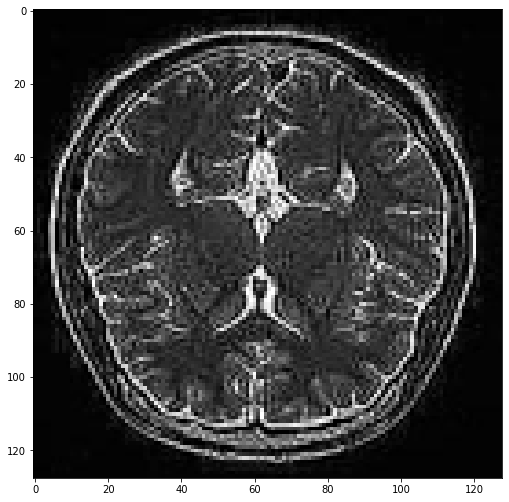

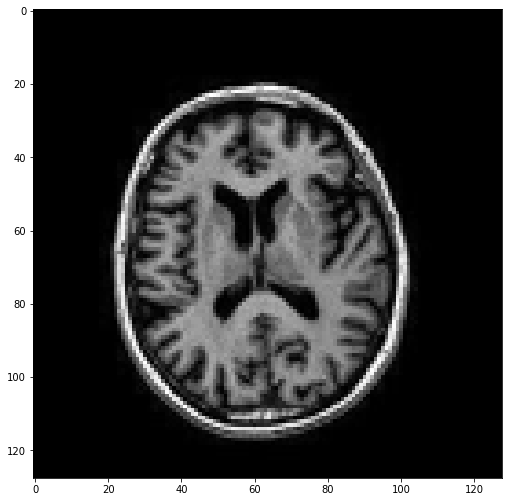

In [23]:
for i in range(5):
    fig = plt.figure(figsize=(50,50))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

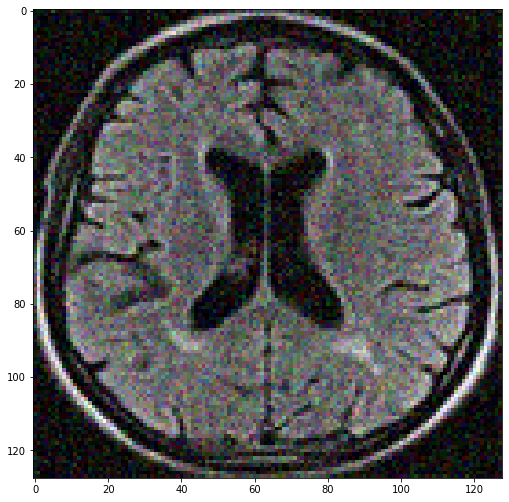

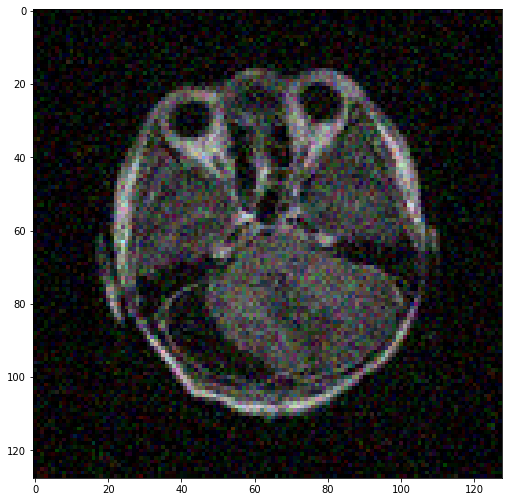

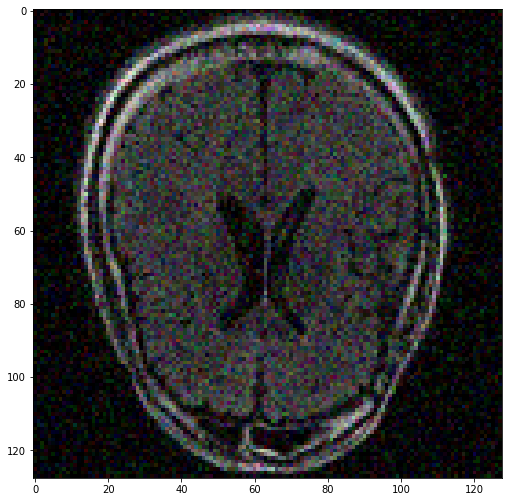

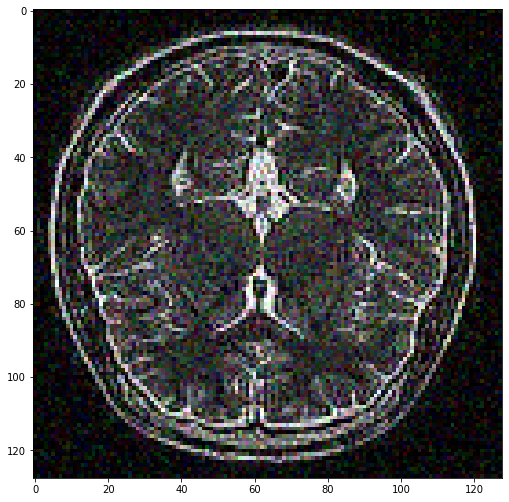

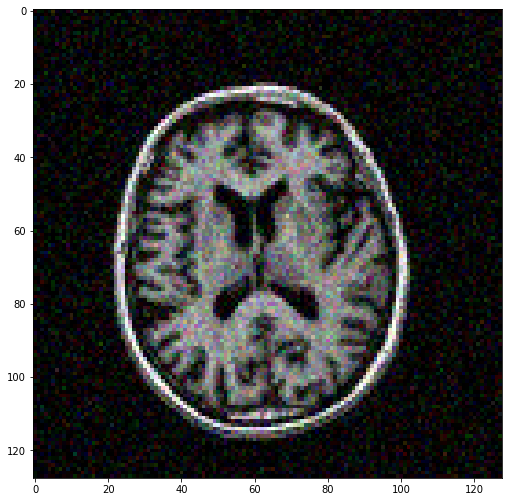

In [24]:
for i in range(5):
    fig = plt.figure(figsize=(50,50))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data_noisy[i])
    plt.show(image)

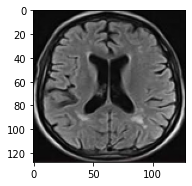

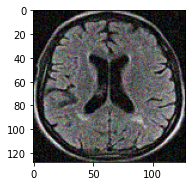

In [25]:
plt.subplot(1,2,1)
#fig = plt.figure(figsize=(10,10))
image1 = plt.imshow(data[0])
plt.show(image1)
plt.subplot(1,2,2)
image2 = plt.imshow(data_noisy[0])
plt.show(image2)


In [ ]:


# model = keras.Sequential([
    
#     layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
#     layers.MaxPool2D(),
    
#     layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.MaxPool2D(),
    
#     layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.MaxPool2D(),
    
#     layers.Conv2DTranspose(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.UpSampling2D(),

#     layers.Conv2DTranspose(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.UpSampling2D(),

#     layers.Conv2DTranspose(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.UpSampling2D(),

#     layers.Conv2D(filters=3, kernel_size=(5,5), activation="sigmoid", padding='same'),
    
# ])

# model.summary()


In [ ]:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
# history = model.fit(
#     x = data_noisy,
#     y = data,
#     validation_data= (data_test_noisy,data_test),
#     batch_size = 30,
#     epochs=2,
# )

In [ ]:
# pred = model.predict(data_test_noisy)

In [ ]:
# print(pred[0])

In [ ]:
# pred.shape

(10, 128, 128, 3)

In [ ]:
# pred[0].shape

(128, 128, 3)

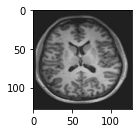

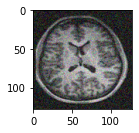

In [26]:
plt.subplot(2,2,1)
#fig = plt.figure(figsize=(10,10))
image1 = plt.imshow(data_test[0])
plt.show(image1)
plt.subplot(2,2,2)
image2 = plt.imshow(data_test_noisy[0])
plt.show(image2)



In [ ]:
# print(data_test[0])

In [27]:
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D

In [28]:
source="https://github.com/aswintechguy/Deep-Learning-Projects/blob/main/Autoencoder%20-%20Deep%20CNN/Deep%20CNN%20Autoencoder%20-%20Denoising%20Image.ipynb"

In [ ]:
model_1 = Sequential([
                    # encoder network
                    Conv2D(64, 4, activation='relu', padding='same', input_shape=(128, 128, 3)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(32, 4, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(32, 4, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(64, 4, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(3, 4, activation='sigmoid', padding='same')
])

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 up_sampling2d (UpSampling2D  (None, 64, 64, 32)       0

In [ ]:
# model_1 = Sequential([
#                     # encoder network
#                     Conv2D(32, 3, activation='relu', padding='same', input_shape=(128, 128, 3)),
#                     MaxPooling2D(2, padding='same'),
#                     Conv2D(16, 3, activation='relu', padding='same'),
#                     MaxPooling2D(2, padding='same'),
#                     # decoder network
#                     Conv2D(16, 3, activation='relu', padding='same'),
#                     UpSampling2D(2),
#                     Conv2D(32, 3, activation='relu', padding='same'),
#                     UpSampling2D(2),
#                     # output layer
#                     Conv2D(3, 3, activation='sigmoid', padding='same')
# ])

# model_1.compile(optimizer='adam', loss='binary_crossentropy')
# model_1.summary()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [ ]:
history = model_1.fit(
    x = data_noisy,
    y = data,
    validation_data= (data_test_noisy,data_test),
    batch_size = 32,
    epochs=100,
    callbacks=[callback]

)

Epoch 1/100
58/58 [==============================] - 15s 99ms/step - loss: 0.4559 - accuracy: 0.3192 - val_loss: 0.3840 - val_accuracy: 0.4192
Epoch 2/100
58/58 [==============================] - 5s 78ms/step - loss: 0.3770 - accuracy: 0.3224 - val_loss: 0.3748 - val_accuracy: 0.3956
Epoch 3/100
58/58 [==============================] - 5s 78ms/step - loss: 0.3703 - accuracy: 0.3461 - val_loss: 0.3677 - val_accuracy: 0.2242
Epoch 4/100
58/58 [==============================] - 5s 78ms/step - loss: 0.3662 - accuracy: 0.2950 - val_loss: 0.3629 - val_accuracy: 0.3243
Epoch 5/100
58/58 [==============================] - 5s 79ms/step - loss: 0.3627 - accuracy: 0.3153 - val_loss: 0.3601 - val_accuracy: 0.3317
Epoch 6/100
58/58 [==============================] - 5s 79ms/step - loss: 0.3605 - accuracy: 0.3192 - val_loss: 0.3584 - val_accuracy: 0.3123
Epoch 7/100
58/58 [==============================] - 5s 79ms/step - loss: 0.3591 - accuracy: 0.3367 - val_loss: 0.3580 - val_accuracy: 0.3019
Epoch

In [ ]:
pred = model_1.predict(data_test_noisy)


16/16 [==============================] - 0s 24ms/step


In [ ]:
pred.shape

(483, 128, 128, 3)

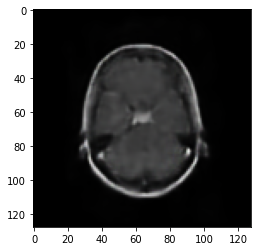

In [ ]:
plt.imshow(pred[2].reshape(128,128,3))


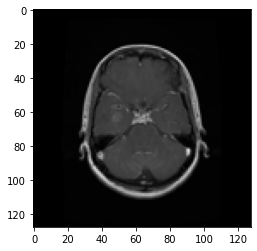

In [ ]:
image1 = plt.imshow(data_test[2])

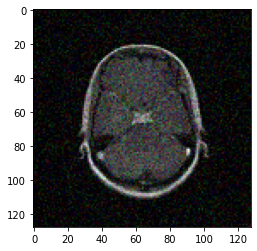

In [ ]:
image1 = plt.imshow(data_test_noisy[2])